## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 13 column and 10841 rows.

## Feature Information

| Feature         | Description                                   |
|-----------------|-----------------------------------------------|
| **App**         | Name of the App                               |
| **Category**    | Category under which the App falls           |
| **Rating**      | Application's rating on Play Store            |
| **Reviews**     | Number of reviews of the App                   |
| **Size**        | Size of the App                                |
| **Installs**    | Number of installs of the App                   |
| **Type**        | Whether the App is free or paid                 |
| **Price**       | Price of the App (0 if free)                     |
| **Content Rating** | Appropriate target audience of the App          |
| **Genres**      | Genre under which the App falls                   |
| **Last Updated**| Date when the App was last updated                |
| **Current Ver** | Current version of the Application                 |
| **Android Ver** | Minimum Android version required to run the App    |


    
### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [15]:
play_store = pd.read_csv('google_playstore.csv')

In [16]:
play_store.shape

(10841, 13)

In [17]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [18]:
play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [19]:
play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and observation
The dataset has missing values

In [20]:
play_store.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning & Feature Engineering

In [21]:
play_store['Rating'].fillna(play_store['Rating'].median(), inplace=True)

In [22]:
play_store['Content Rating'].fillna(play_store['Content Rating'].mode()[0], inplace=True)
play_store['Type'].fillna(play_store['Type'].mode()[0], inplace=True)
play_store['Current Ver'].fillna(play_store['Current Ver'].mode()[0], inplace=True)
play_store['Android Ver'].fillna(play_store['Android Ver'].mode()[0], inplace=True)

In [23]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [24]:
play_store['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [25]:
play_store['Size_MB'] = play_store['Size'].replace('Varies with device', None)
play_store['Size_MB'] = play_store['Size_MB'].str.replace('M', '')
play_store['Size_MB'] = play_store['Size_MB'].str.replace('K', '')
play_store['Size_MB'] = pd.to_numeric(play_store['Size_MB'], errors='coerce')
play_store.loc[play_store['Size'].str.endswith('K', na=False), 'Size_MB'] /= 1024
play_store.drop('Size', axis=1, inplace=True)

In [26]:
play_store['Size_MB'].isnull().sum()

np.int64(2012)

In [27]:
play_store['Size_MB'] = play_store.groupby('Category')['Size_MB'].transform(lambda x: x.fillna(x.median()))

In [28]:
play_store['Size_MB'].isnull().sum()

np.int64(1)

In [29]:
play_store[play_store['Size_MB'].isna()]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up,NaN


In [30]:
play_store[play_store['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].shape[0]

1

In [31]:
play_store.dropna(subset=['Size_MB'], inplace=True)

In [32]:
play_store.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [33]:
play_store['Size_MB']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     8.0
10840    19.0
Name: Size_MB, Length: 10840, dtype: float64

In [34]:
play_store['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [35]:
play_store['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [36]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        play_store[cols]=play_store[cols].str.replace(item,'')

In [37]:
play_store['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [38]:
play_store['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [39]:
play_store['Installs']=play_store['Installs'].astype(int)
play_store['Price']=play_store['Price'].astype(float)

In [40]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Installs        10840 non-null  int64  
 5   Type            10840 non-null  object 
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10840 non-null  object 
 11  Android Ver     10840 non-null  object 
 12  Size_MB         10840 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [41]:
## Handling last updated feature 
play_store['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [42]:
play_store['Last Updated']=pd.to_datetime(play_store['Last Updated'])
play_store['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [43]:
play_store['LU_day']=play_store['Last Updated'].dt.day
play_store['LU_month']=play_store['Last Updated'].dt.month
play_store['LU_year']=play_store['Last Updated'].dt.year

In [44]:
play_store.drop('Last Updated',axis=1,inplace=True)

In [45]:
play_store.head(2)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Size_MB,LU_day,LU_month,LU_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,14.0,15,1,2018


In [46]:
play_store[play_store.duplicated('App')].shape

(1181, 15)

## Observation
The data has duplicate records

In [47]:
play_store=play_store.drop_duplicates(subset=['App'],keep='first')

In [48]:
play_store.shape

(9659, 15)

## Exploratory Data Analysis

In [54]:
play_store.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Size_MB,LU_day,LU_month,LU_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,14.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8.7,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,25.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2.8,20,6,2018


In [55]:
numeric_features = [feature for feature in play_store.columns if play_store[feature].dtype != 'object']
categorical_features = [feature for feature in play_store.columns if play_store[feature].dtype == 'object']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Rating', 'Installs', 'Price', 'Size_MB', 'LU_day', 'LU_month', 'LU_year']

We have 8 categorical features : ['App', 'Category', 'Reviews', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [56]:
play_store['Reviews']=play_store['Reviews'].astype(int)

In [57]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(play_store[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
---------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY         

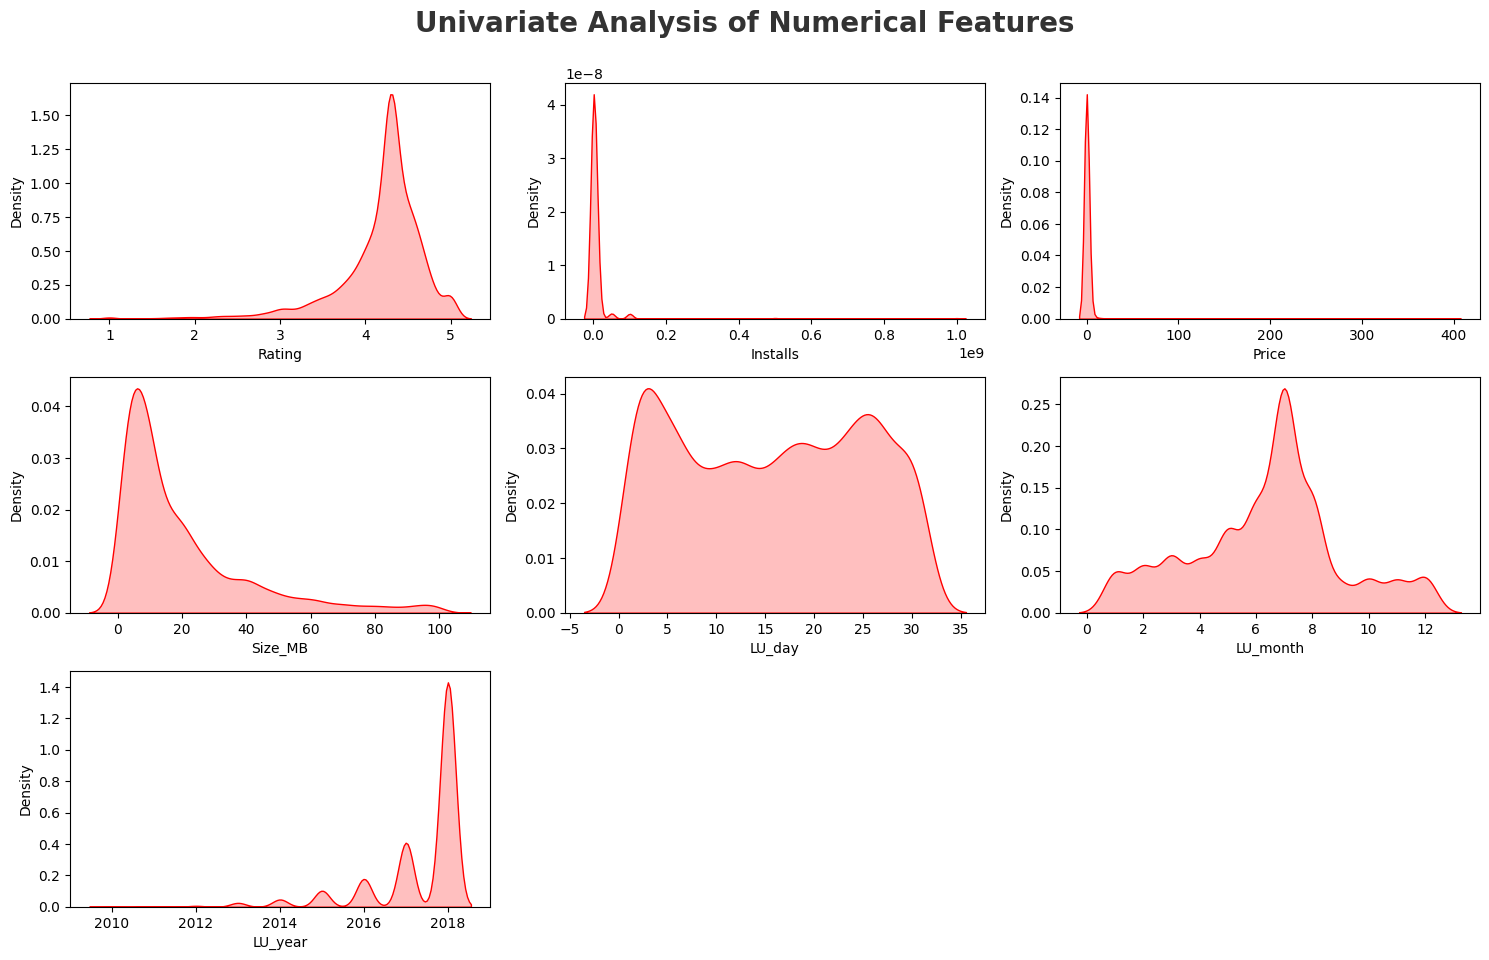

In [58]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=play_store[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

plt.show()

## Observations
- Rating and Year is left skewed while Size,Installs and Price are right skewed

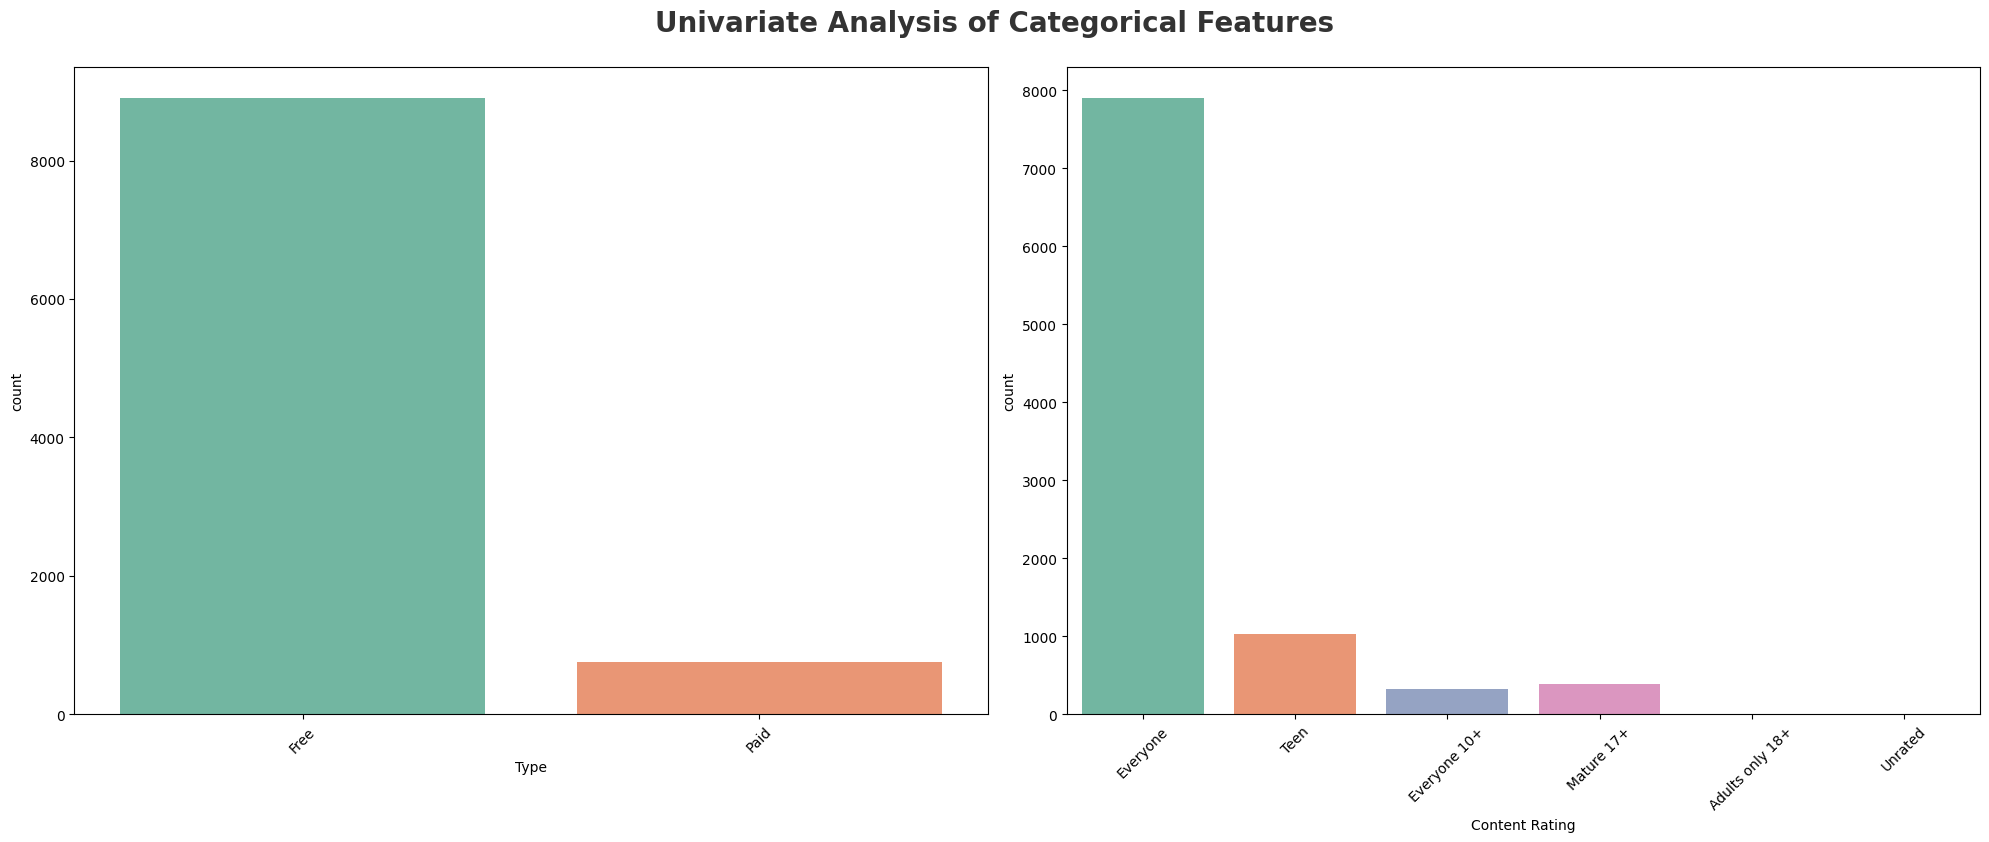

In [59]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=play_store[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

plt.show()

## Which is the most popular app category?

In [60]:
play_store.head(2)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Size_MB,LU_day,LU_month,LU_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,14.0,15,1,2018


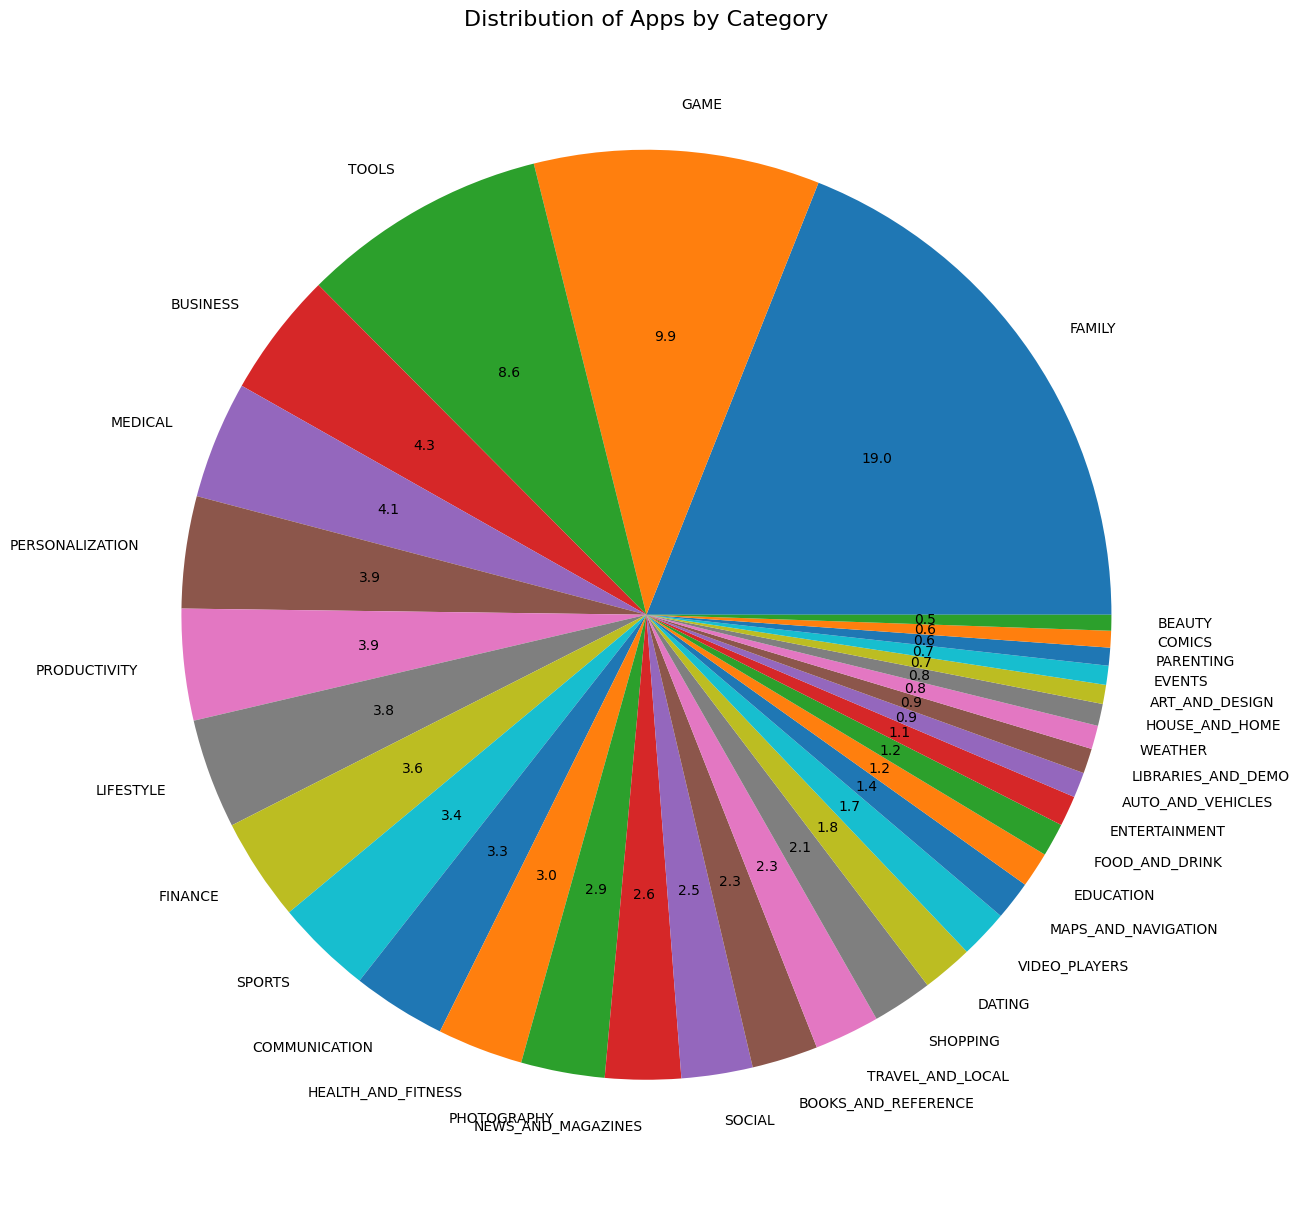

In [61]:
play_store['Category'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f')
plt.title('Distribution of Apps by Category', fontsize=16)
plt.ylabel('')  # Optional: hides the default label
plt.show()

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [62]:
## Top 10 App Categories
category = pd.DataFrame({'Count': play_store['Category'].value_counts()})

In [63]:
category

,Count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


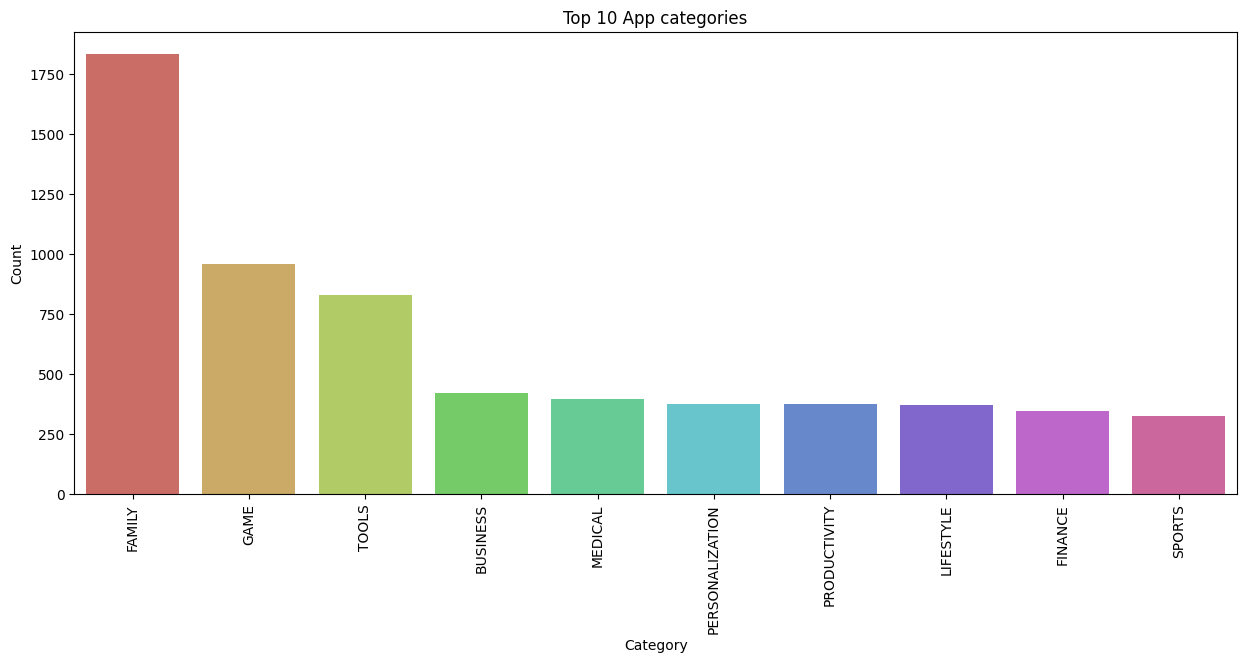

In [ ]:
# Top 10 Apps Categories
category_df = category.reset_index()
category_df.columns = ['Category', 'Count']

plt.figure(figsize=(15,6))
sns.barplot(x='Category', y='Count', data=category_df[:10], palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()


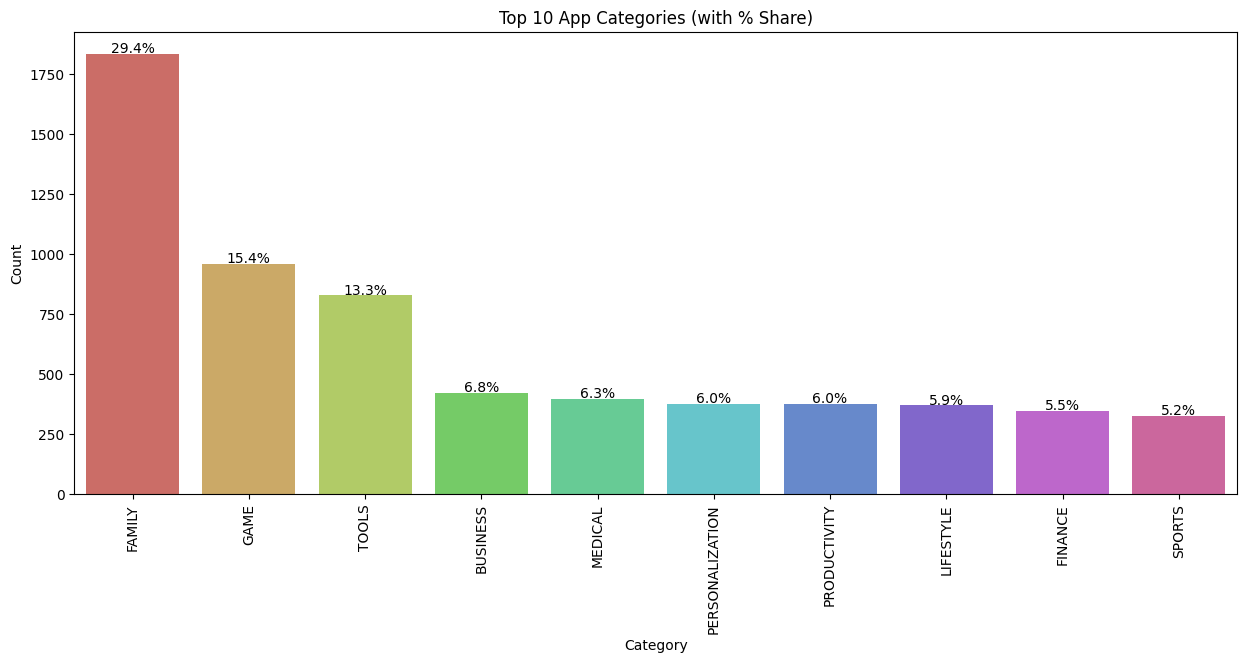

In [65]:
# Top 10 App Categories with percentage calculation
category_df = play_store['Category'].value_counts().head(10).reset_index()
category_df.columns = ['Category', 'Count']

# Calculate percentage of each category relative to the total
total = category_df['Count'].sum()
category_df['Percent'] = (category_df['Count'] / total * 100).round(1)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Category', y='Count', data=category_df, palette='hls')
plt.title('Top 10 App Categories (with % Share)')
plt.xticks(rotation=90)

# Adding percentage text labels above bars
for index, row in category_df.iterrows():
    plt.text(index, row['Count'] + 5, f"{row['Percent']}%", ha='center', fontsize=10)

plt.show()


## Insights
1. Family category has the most number of apps with 29.4% of apps belonging to it, followed by Games category which has 15.4% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations??

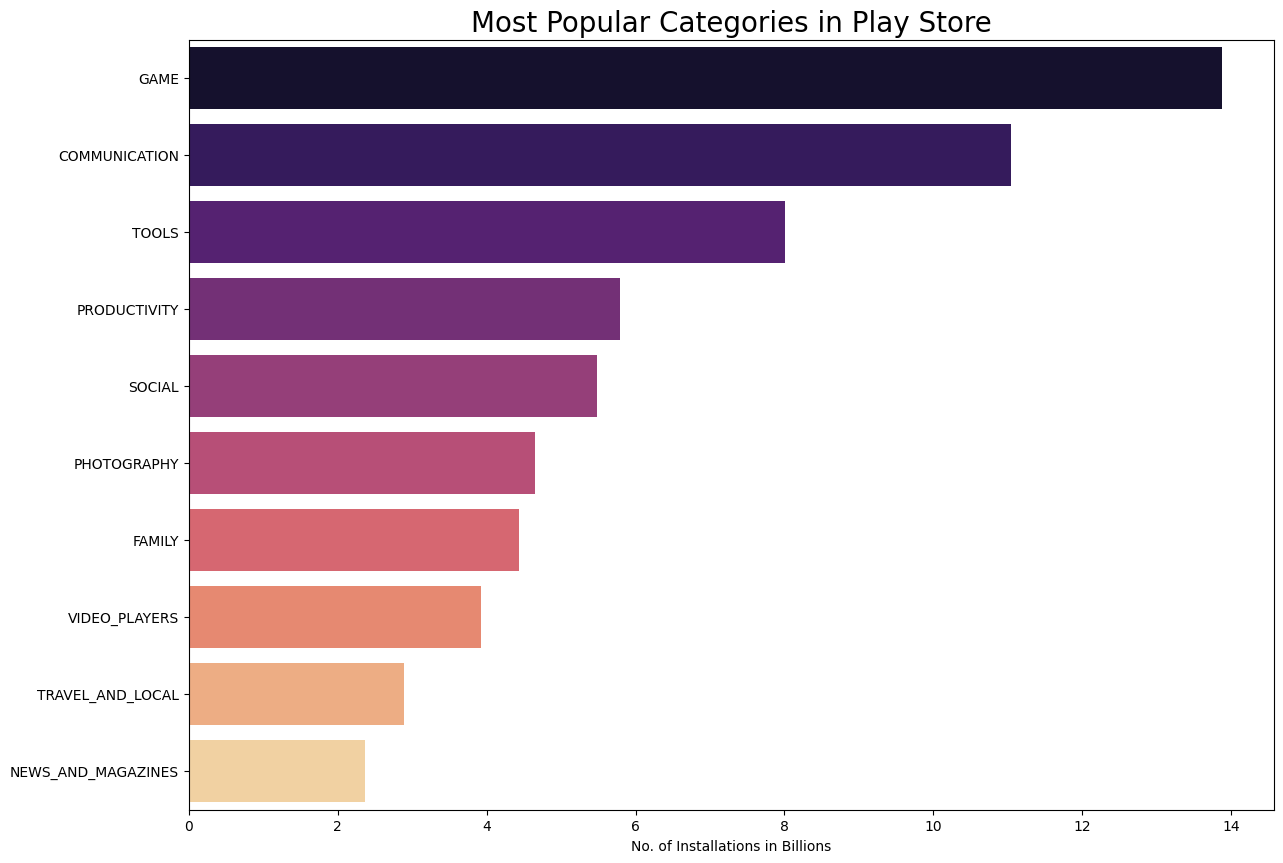

In [66]:
cat_installs = play_store.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
cat_installs.Installs = cat_installs.Installs/1000000000  # converting into billions
cat_installs_top10 = cat_installs.head(10)


plt.figure(figsize = (14,10))
sns.barplot(x = 'Installs' , y = 'Category' , data = cat_installs_top10, palette='magma')
plt.xlabel('No. of Installations in Billions')
plt.ylabel('')
plt.title("Most Popular Categories in Play Store", size = 20)
plt.show()

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 14 Billion Installations GAME is the most popular Category in Google Play Store.

In [67]:
play_store.head(2)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Size_MB,LU_day,LU_month,LU_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,14.0,15,1,2018


## What are the Top 5 most installed Apps in Each popular Categories ??

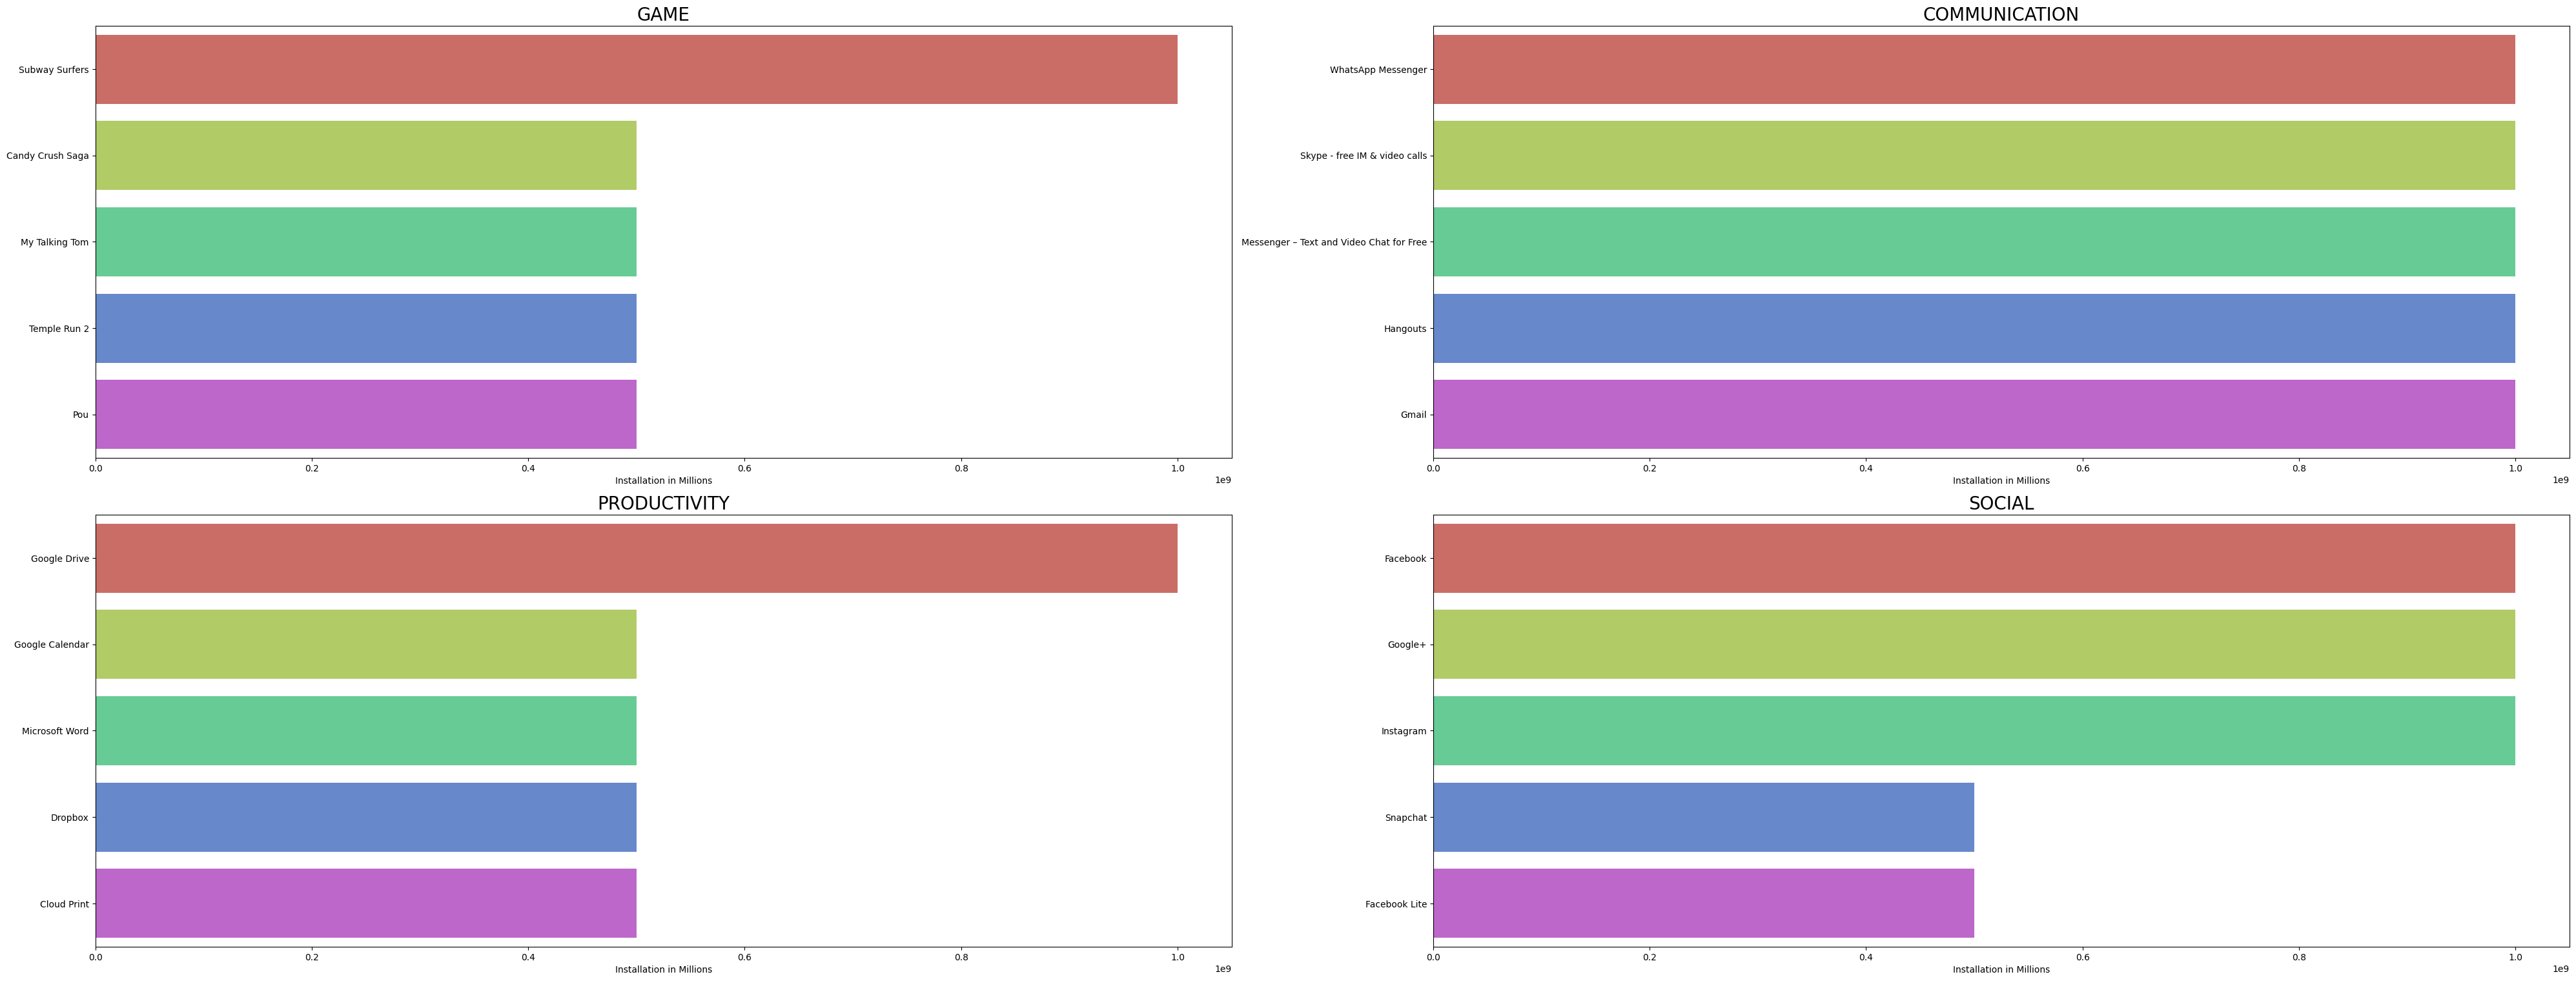

In [68]:
most_installed = play_store.groupby([ 'App','Category'])['Installs'].sum().reset_index()
most_installed = most_installed.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    most_installed_2 = most_installed[most_installed.Category == app]
    most_installed_3 = most_installed_2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= most_installed_3,x= 'Installs' ,y='App' ,palette='hls')
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.show()

## How many apps are there on Google Play Store which get 5 ratings??

In [69]:
rating = play_store.groupby(['Category','Installs', 'App'])['Rating'].mean().sort_values(ascending = False).reset_index()

top_5_star_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",top_5_star_apps.shape[0])
top_5_star_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


## Insights
- There are 271 five rated apps on Google Play Store.